In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
match_df=pd.read_csv('./matches.csv')
match_df.sample(10)


,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
200,201,IPL-2010,Mumbai,30-03-2010,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,SL Malinga,Brabourne Stadium,BR Doctrove,SK Tarapore,NaN
262,263,IPL-2011,Delhi,26-04-2011,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,3,V Kohli,Feroz Shah Kotla,S Asnani,RJ Tucker,NaN
435,436,IPL-2013,Chandigarh,09-05-2013,Kings XI Punjab,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,8,KK Cooper,"Punjab Cricket Association Stadium, Mohali",HDPK Dharmasena,S Ravi,NaN
593,594,IPL-2016,Hyderabad,23-04-2016,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,5,Mustafizur Rahman,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,CK Nandan,NaN
564,565,IPL-2015,Raipur,12-05-2015,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,normal,0,Delhi Daredevils,0,6,Z Khan,Shaheed Veer Narayan Singh International Stadium,RK Illingworth,VA Kulkarni,NaN
201,202,IPL-2010,Chennai,31-03-2010,Royal Challengers Bangalore,Chennai Super Kings,Royal Challengers Bangalore,bat,normal,0,Chennai Super Kings,0,5,M Vijay,"MA Chidambaram Stadium, Chepauk",BG Jerling,RE Koertzen,NaN
209,210,IPL-2010,Nagpur,05-04-2010,Rajasthan Royals,Deccan Chargers,Rajasthan Royals,bat,normal,0,Rajasthan Royals,2,0,SK Warne,"Vidarbha Cricket Association Stadium, Jamtha",HDPK Dharmasena,SJA Taufel,NaN
549,550,IPL-2015,Bangalore,02-05-2015,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,Mandeep Singh,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
369,370,IPL-2012,Mumbai,16-05-2012,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Kolkata Knight Riders,32,0,SP Narine,Wankhede Stadium,S Das,BR Doctrove,NaN
15,16,IPL-2017,Mumbai,16-04-2017,Gujarat Lions,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,N Rana,Wankhede Stadium,A Nand Kishore,S Ravi,NaN


In [ ]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
match_df.shape

(756, 18)

In [ ]:
dlvr_df=pd.read_csv('./deliveries.csv')
dlvr_df.sample(10)


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
113515,479,2,Mumbai Indians,Kings XI Punjab,2,4,AT Rayudu,CM Gautam,L Balaji,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
57319,242,2,Mumbai Indians,Royal Challengers Bangalore,18,1,AT Rayudu,SR Tendulkar,A Mithun,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
66952,283,1,Kochi Tuskers Kerala,Royal Challengers Bangalore,13,4,RA Jadeja,BJ Hodge,CH Gayle,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
83785,355,1,Chennai Super Kings,Mumbai Indians,11,1,DJ Bravo,SK Raina,DR Smith,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
48407,205,2,Royal Challengers Bangalore,Kings XI Punjab,5,3,KP Pietersen,MK Pandey,SJ Srivastava,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
101094,426,2,Pune Warriors,Royal Challengers Bangalore,16,3,RV Uthappa,AD Mathews,M Muralitharan,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
127200,536,1,Rajasthan Royals,Kings XI Punjab,15,2,AM Rahane,DJ Hooda,Shivam Sharma,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
110117,465,1,Chennai Super Kings,Delhi Daredevils,4,4,SK Raina,DR Smith,JD Unadkat,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
14776,63,2,Royal Challengers Bangalore,Mumbai Indians,16,6,MV Boucher,JH Kallis,SM Pollock,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
83081,352,1,Chennai Super Kings,Deccan Chargers,19,1,MS Dhoni,RA Jadeja,A Ashish Reddy,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [ ]:
dlvr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [ ]:
dlvr_df.shape

(179078, 21)

# total scores in every inning

In [ ]:
dlvr_df.groupby(['match_id','inning']).sum()['total_runs']

match_id  inning
1         1         207
          2         172
2         1         184
          2         187
3         1         183
                   ... 
11413     2         170
11414     1         155
          2         162
11415     1         152
          2         157
Name: total_runs, Length: 1528, dtype: int64

In [ ]:
inn_score=dlvr_df.groupby(['match_id','inning']).sum()['total_runs'].reset_index()


In [ ]:
inn_score=inn_score[inn_score['inning']==1]
inn_score

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


# merge inn_score with match_df

In [ ]:
match_df = match_df.merge(inn_score[['match_id', 'total_runs']], left_on = 'id', right_on = 'match_id')
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [ ]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [ ]:
match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad') 
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

# keep data for existing team

In [ ]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
    ]

In [ ]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [ ]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Mumbai Indians', 'Chennai Super Kings', 'Rajasthan Royals'],
      dtype=object)

# get rid Douglus luies(rain occured and match was stopped)

In [ ]:
match_df['dl_applied'].unique()

array([0, 1])

In [ ]:
match_df = match_df[match_df['dl_applied'] != 1]

In [ ]:
match_df = match_df[['match_id', 'city', 'winner', 'total_runs']]
match_df

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,207
4,5,Bangalore,Royal Challengers Bangalore,157
6,7,Mumbai,Mumbai Indians,178
7,8,Indore,Kings XI Punjab,148
9,10,Mumbai,Mumbai Indians,158
...,...,...,...,...
751,11347,Mumbai,Mumbai Indians,143
752,11412,Chennai,Mumbai Indians,136
753,11413,Visakhapatnam,Delhi Capitals,171
754,11414,Visakhapatnam,Chennai Super Kings,155


In [ ]:
dlvr_df = match_df.merge(dlvr_df, on='match_id')
dlvr_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


# filtering 2nd inning deliveries

In [ ]:
dlvr_df = dlvr_df[dlvr_df['inning'] == 2]
dlvr_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


# current score to the 2nd inning data

In [ ]:
dlvr_df['current_score'] = dlvr_df.groupby('match_id').cumsum()['total_runs_y']
dlvr_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,1,0,1,NaN,NaN,NaN,1
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,2,0,2,NaN,NaN,NaN,3
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,4,0,4,NaN,NaN,NaN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,1,0,1,NaN,NaN,NaN,152
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,2,0,2,NaN,NaN,NaN,154
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,1,0,1,SR Watson,run out,KH Pandya,155
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,2,0,2,NaN,NaN,NaN,157


In [ ]:
### run left

dlvr_df['runs_left'] = dlvr_df['total_runs_x'] - dlvr_df['current_score']
dlvr_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,1,0,1,NaN,NaN,NaN,1,206
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,206
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,206
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,2,0,2,NaN,NaN,NaN,3,204
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,4,0,4,NaN,NaN,NaN,7,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,1,0,1,NaN,NaN,NaN,152,0
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,2,0,2,NaN,NaN,NaN,154,-2
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,1,0,1,SR Watson,run out,KH Pandya,155,-3
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,2,0,2,NaN,NaN,NaN,157,-5


In [ ]:
### Balls left

dlvr_df['balls_left'] = 120 - ((dlvr_df['over'] - 1) * 6 + dlvr_df['ball'])
dlvr_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,204,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,200,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,0,4
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-2,3
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-3,2
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-5,1


In [ ]:
### wickets

dlvr_df['player_dismissed'].fillna("0")
dlvr_df['player_dismissed'].apply(lambda x:x  if x==0 else 1)

In [ ]:
# creating 'wickets left' feature from 'player_dismissed' feature
dlvr_df['player_dismissed']=dlvr_df['player_dismissed'].fillna(0, inplace = True)
# creating a lambda function like - 0 for nan values and 1 for player dismissed 
dlvr_df['player_dismissed'] = dlvr_df['player_dismissed'].apply(lambda x:x if x == 0 else 1)

wickets = dlvr_df.groupby('match_id').cumsum()['player_dismissed'].values
total_wickets = 10
dlvr_df['wickets_left'] = total_wickets - wickets
dlvr_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,1,NaN,NaN,1,206,119,9
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,1,NaN,NaN,1,206,118,8
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,1,NaN,NaN,1,206,117,7
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,1,NaN,NaN,3,204,116,6
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,1,NaN,NaN,7,200,115,5


In [ ]:
# current run rate (crr = runs/overs)
total_balls = 120
dlvr_df['crr'] = (dlvr_df['current_score'] * 6) / (total_balls - dlvr_df['balls_left'])
dlvr_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,crr
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,1,NaN,NaN,1,206,119,9,6.000000
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,1,NaN,NaN,1,206,118,8,3.000000
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,1,NaN,NaN,1,206,117,7,2.000000
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,1,NaN,NaN,3,204,116,6,4.500000
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,1,NaN,NaN,7,200,115,5,8.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,1,NaN,NaN,152,0,4,-110,7.862069
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,1,NaN,NaN,154,-2,3,-111,7.897436
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,1,run out,KH Pandya,155,-3,2,-112,7.881356
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,1,NaN,NaN,157,-5,1,-113,7.915966


In [ ]:
# required run rate (rrr = (Runs required to win / Balls Remaining  ) x 6)
dlvr_df['rrr'] = (dlvr_df['runs_left']*6) / dlvr_df['balls_left']
dlvr_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,1,NaN,NaN,1,206,119,9,6.000000,10.386555
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,1,NaN,NaN,1,206,118,8,3.000000,10.474576
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,1,NaN,NaN,1,206,117,7,2.000000,10.564103
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,1,NaN,NaN,3,204,116,6,4.500000,10.551724
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,1,NaN,NaN,7,200,115,5,8.400000,10.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,1,NaN,NaN,152,0,4,-110,7.862069,0.000000
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,1,NaN,NaN,154,-2,3,-111,7.897436,-4.000000
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,1,run out,KH Pandya,155,-3,2,-112,7.881356,-9.000000
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,1,NaN,NaN,157,-5,1,-113,7.915966,-30.000000


In [ ]:
# match result: 0-lose | 1-win
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

dlvr_df['result'] = dlvr_df.apply(result,axis=1)

# clean the final data

In [ ]:
final_df = dlvr_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','total_runs_x','crr','rrr','result']]
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,119,9,207,6.000000,10.386555,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,118,8,207,3.000000,10.474576,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,117,7,207,2.000000,10.564103,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,204,116,6,207,4.500000,10.551724,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,200,115,5,207,8.400000,10.434783,0
...,...,...,...,...,...,...,...,...,...,...
149573,Chennai Super Kings,Mumbai Indians,Hyderabad,0,4,-110,152,7.862069,0.000000,0
149574,Chennai Super Kings,Mumbai Indians,Hyderabad,-2,3,-111,152,7.897436,-4.000000,0
149575,Chennai Super Kings,Mumbai Indians,Hyderabad,-3,2,-112,152,7.881356,-9.000000,0
149576,Chennai Super Kings,Mumbai Indians,Hyderabad,-5,1,-113,152,7.915966,-30.000000,0


In [ ]:
final_df = final_df[final_df['balls_left'] != 0]
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,119,9,207,6.000000,10.386555,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,118,8,207,3.000000,10.474576,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,117,7,207,2.000000,10.564103,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,204,116,6,207,4.500000,10.551724,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,200,115,5,207,8.400000,10.434783,0
...,...,...,...,...,...,...,...,...,...,...
149572,Chennai Super Kings,Mumbai Indians,Hyderabad,1,5,-109,152,7.878261,1.200000,0
149573,Chennai Super Kings,Mumbai Indians,Hyderabad,0,4,-110,152,7.862069,0.000000,0
149574,Chennai Super Kings,Mumbai Indians,Hyderabad,-2,3,-111,152,7.897436,-4.000000,0
149575,Chennai Super Kings,Mumbai Indians,Hyderabad,-3,2,-112,152,7.881356,-9.000000,0


In [ ]:
x=final_df.iloc[:,:-1]
y=final_df.iloc[:,-1]

In [ ]:
x

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,119,9,207,6.000000,10.386555
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,118,8,207,3.000000,10.474576
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,117,7,207,2.000000,10.564103
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,204,116,6,207,4.500000,10.551724
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,200,115,5,207,8.400000,10.434783
...,...,...,...,...,...,...,...,...,...
149572,Chennai Super Kings,Mumbai Indians,Hyderabad,1,5,-109,152,7.878261,1.200000
149573,Chennai Super Kings,Mumbai Indians,Hyderabad,0,4,-110,152,7.862069,0.000000
149574,Chennai Super Kings,Mumbai Indians,Hyderabad,-2,3,-111,152,7.897436,-4.000000
149575,Chennai Super Kings,Mumbai Indians,Hyderabad,-3,2,-112,152,7.881356,-9.000000


In [ ]:
y

125       0
126       0
127       0
128       0
129       0
         ..
149572    0
149573    0
149574    0
149575    0
149576    0
Name: result, Length: 72172, dtype: int64

## split into train and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)


In [ ]:
X_train.shape

(57737, 9)

In [ ]:
y_train.shape

(57737,)

# data preparation

In [ ]:
## transform the catogorical feature
## one hot encoding

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

col_trf = ColumnTransformer([
    ('col_trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [ ]:
model_pipe = Pipeline(steps=[
    ('step1',col_trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

model_pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [ ]:
model_pipe.predict(X_test)

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
model_pipe.predict_proba(X_test)

array([[0.33207815, 0.66792185],
       [0.08811173, 0.91188827],
       [0.02713345, 0.97286655],
       ...,
       [0.18876679, 0.81123321],
       [0.84866219, 0.15133781],
       [0.07431519, 0.92568481]])

# accuracy

In [ ]:
y_pred = model_pipe.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7919639764461378

In [ ]:
model_pipe.predict_proba(X_test)[10]

array([0.31038297, 0.68961703])

In [ ]:
def win_prob_calc(match_data, match_id, model):
    """
    At every delivery, the model will calculate the probability
    for the chasing team.
    """
    
    match = match_data[match_data['match_id'] == match_id]
    
    ## Match between teams
    print(f"Match: {match['batting_team'].iloc[0]} vs {match['bowling_team'].iloc[0]}")
    
    # converting ball by ball data to over by over data
    match = match[(match['ball'] == 6)]
    
    # get all the required columns in a copy dataframe
    copy_df = match[['batting_team','bowling_team','city','runs_left',\
                     'balls_left','wickets_left','total_runs_x','crr','rrr']].dropna()
    
    # get rows where balls left are not zero - avoiding division by zero error
    copy_df = copy_df[copy_df['balls_left'] != 0]
    
    # calculate probability using the model
    result = model.predict_proba(copy_df)
    
    ## calculating percentage chance(prob multiplied by 100) for each team
    copy_df['lose'] = np.round(result.T[0]*100,1)
    copy_df['win'] = np.round(result.T[1]*100,1)
    
    # end of over 
    copy_df['end_of_over'] = range(1, copy_df.shape[0]+1)
    
    
    target = copy_df['total_runs_x'].values[0]
    print("Target:", target)
    
    # calculate runs left
    runs = list(copy_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0, target)
    
    copy_df['runs_in_over'] = np.array(runs)[:-1] - np.array(new_runs)
    
    wickets = list(copy_df['wickets_left'].values)
    
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    # 
    w = np.array(wickets)
    nw = np.array(new_wickets)
    
    copy_df['wickets_in_over'] = (nw - w)[0:copy_df.shape[0]]
    
    copy_df = copy_df[['end_of_over','runs_in_over','wickets_in_over','lose','win']]
    
    # chasing team win probability
    print(f"Win probability for {match['batting_team'].iloc[0]}")
    
    return copy_df, target


In [ ]:
X_test

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr
59917,Mumbai Indians,Deccan Chargers,Visakhapatnam,86,57,-53,138,4.952381,9.052632
139105,Sunrisers Hyderabad,Delhi Capitals,Delhi,57,71,-40,134,9.428571,4.816901
15255,Kings XI Punjab,Royal Challengers Bangalore,Chandigarh,19,35,-78,143,8.752941,3.257143
89115,Royal Challengers Bangalore,Kolkata Knight Riders,Sharjah,140,108,-3,150,5.000000,7.777778
722,Mumbai Indians,Kolkata Knight Riders,Mumbai,60,27,-89,178,7.612903,13.333333
...,...,...,...,...,...,...,...,...,...
99118,Chennai Super Kings,Royal Challengers Bangalore,Bangalore,-6,14,-97,154,9.056604,-2.571429
36587,Royal Challengers Bangalore,Mumbai Indians,Mumbai,146,111,1,151,3.333333,7.891892
110353,Mumbai Indians,Chennai Super Kings,Chennai,97,85,-26,158,10.457143,6.847059
75162,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata,109,53,-59,180,6.358209,12.339623


In [ ]:
temp_df, target = win_prob_calc(dlvr_df, 80, model_pipe)
temp_df

Match: Royal Challengers Bangalore vs Deccan Chargers
Target: 165
Win probability for Royal Challengers Bangalore


,end_of_over,runs_in_over,wickets_in_over,lose,win
11927,1,10,6,27.3,72.7
11933,2,6,6,31.7,68.3
11939,3,8,6,31.2,68.8
11945,4,6,6,34.5,65.5
11951,5,6,6,37.9,62.1
11957,6,7,6,39.3,60.7
11963,7,3,6,49.0,51.0
11969,8,7,6,50.5,49.5
11975,9,5,6,56.3,43.7
11981,10,3,6,66.0,34.0


# Plotting the probabilities with runs

Text(0.5, 1.0, 'Target-165')

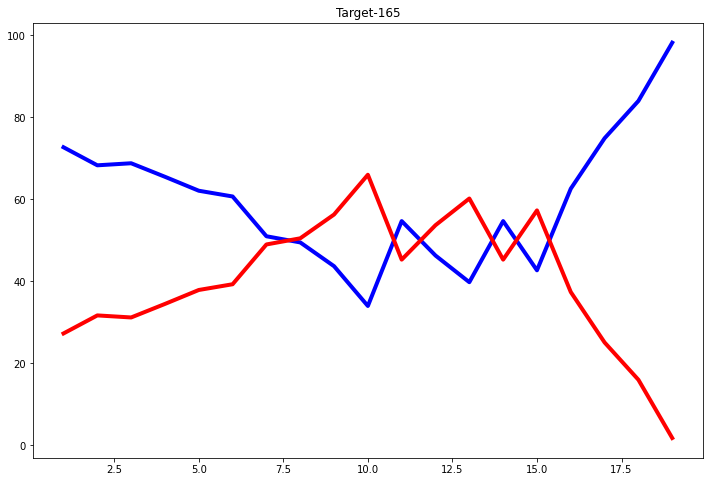

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

## plot win probabilities
plt.plot(temp_df['end_of_over'],temp_df['win'],color='blue',linewidth=4)

## plot losing probabilities
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)

# plt.bar(temp_df['end_of_over'],temp_df['runs_in_over'])
plt.title('Target-' + str(target))


In [ ]:
temp_df, target = win_prob_calc(dlvr_df, 70, model_pipe)
temp_df

Match: Rajasthan Royals vs Royal Challengers Bangalore
Target: 135
Win probability for Rajasthan Royals


,end_of_over,runs_in_over,wickets_in_over,lose,win
9548,1,9,6,3.4,96.6
9554,2,9,6,3.0,97.0
9560,3,7,6,3.3,96.7
9566,4,6,6,3.7,96.3
9572,5,8,6,3.6,96.4
9579,6,6,7,4.3,95.7
9585,7,7,6,4.5,95.5
9591,8,9,6,4.0,96.0
9597,9,7,6,4.1,95.9
9603,10,5,6,5.0,95.0


Text(0.5, 1.0, 'Target-135')

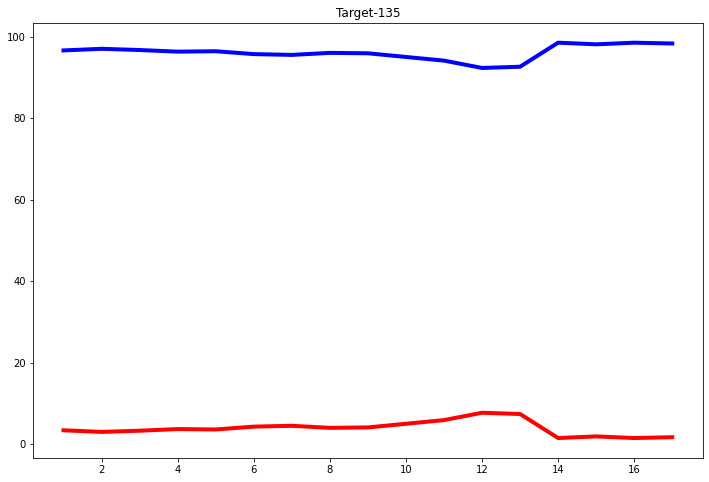

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

## plot win probabilities
plt.plot(temp_df['end_of_over'],temp_df['win'],color='blue',linewidth=4)

## plot losing probabilities
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)

# plt.bar(temp_df['end_of_over'],temp_df['runs_in_over'])
plt.title('Target-' + str(target))
